To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).



Set the average cosmic-ray background is 5. The average number of gamma-rays emitted by your hypothetical source is 6

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats,signal
from scipy.stats import poisson,rayleigh
from scipy.signal import convolve
import numpy

First we plot a graph of background average cosmic-ray background of 5 for 5 days

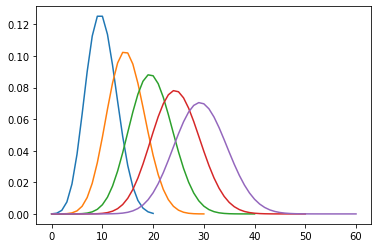

In [82]:
mu = 5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
days = 5
pmf=poisson.pmf(x, mu)
for i in range(days):
    pmf=scipy.signal.convolve(pmf,poisson.pmf(x, mu))
    ax.plot(pmf)

We can see that after 5 days it is still a poisson distribution because as more days we have the more possible we will have sum of the mu be the most so the distribution still be poisson distribution

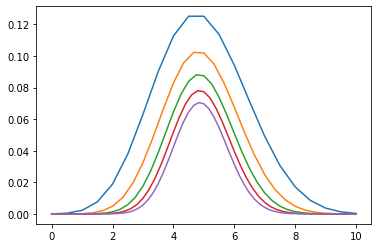

In [106]:
mu = 5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.poisson.pmf(x,mu)
days = 5
new_pmf=pmf
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
    ax.plot(x, new_pmf)


1C:The shape of the distribution approaches a gaussian due to the central limit theorem. This is because the normalized distribution being made up of independently random variable. Didn't happen in b because it is not normalized.

1D: We have 5 days of 6 gamma ray each day will result of 30 total.
N=5 so Y x N=30
Lambda = 5 x 5=25
calculate sigma

In [92]:
p_30 = 1-stats.poisson.cdf(30,25)
print(p_30)
Z = abs(stats.norm.ppf(p_30))
print(Z)
sigma = (30-25)/Z
print('sigma is '+ str(sigma))

0.1366911308473363
1.0953067719494647
sigma is 4.564931148102762


2A: draw a graph of rayleigh distribution

(5, 9)

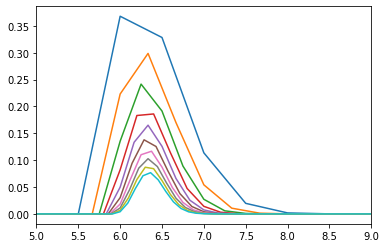

In [111]:
mu = 5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.rayleigh.pdf(x,mu)
days = 10
new_pmf=pmf
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
    ax.plot(x, new_pmf)
plt.xlim(5, 9)

2b:Draw a grph with 60 days

(5, 9)

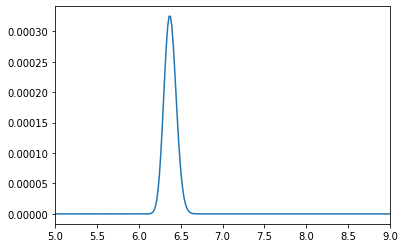

In [120]:
mu = 5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.rayleigh.pdf(x,mu)
days = 60
new_pmf=pmf
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
ax.plot(x, new_pmf)
plt.xlim(5, 9)

The shape is approaching a Gaussian distribution around 60 days.

3.Version1:

A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?



Pick X as 2.34*sqrt(sigma) and Y as 3.45 with standard deviation of 0.5

Sigma: 6.899999160917928
Probability2.6001423236721166e-12
we can claim a discovery


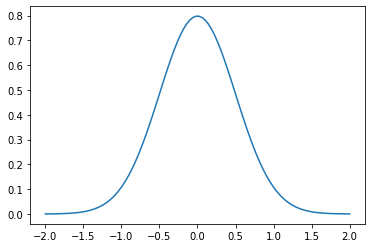

In [132]:
sigma=0.5
X = 2.34*np.sqrt(0.5)
ax = np.linspace(-2,2,100)
Y = 3.45
gr = stats.norm.pdf(ax,0,sigma)
pro = 1-stats.norm.cdf(Y,0,sigma)
Sigma_5 = stats.norm.ppf(1-pro)
print('Sigma: '+ str(Sigma_5))
print('Probability' + str(pro))
print('we can claim a discovery')
plt.plot(ax,gr)


Version 2:

B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

We can just use the probability we have before times 10k

In [140]:
Prob_10000=pro*10000
Prob_10000

2.6001423236721166e-08

C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [141]:
sig_10000= stats.norm.ppf(1-Prob_10000)
sig_10000

5.444322784599315

4.A) Calculate the signal required for a 5-sigma detection in Version 1

5 x 0.5=2.5

4.B) Calculate the signal required for a 5-sigma detection in Version 2

The probability of 5 sigma is 

In [145]:
prob = stats.norm.sf(5)
prob

2.866515718791933e-07

We need to recalculate it with 10 k ccds which is pro/10000

In [147]:
sig_10000=stats.norm.ppf(1-prob/10000,0,0.5)
sig_10000

3.2752687434458276

C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

If we have a trial factor of 10k the signal must be around 0.77 in order to discovery. For five sigma even we have a false occurence of 2.866515718791933e-07
which is pretty small so the sensitivity penalty would be low.

D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [148]:
sig_1000000000=stats.norm.ppf(1-prob/1000000000,0,0.5)
sig_1000000000

4.038285502065062

Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

Even if we had a different distibution shape, as we have many trials it would become a Gaussian over time. So the sensitivity penalty for many trials would be smaller as well